In [1]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
from config import (user,password,host,port,database)

In [2]:
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
employees_data = pd.read_sql("select * from employees", conn)
employees_data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [4]:
employees_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
salary_data = pd.read_sql("SELECT * FROM Salaries", conn)
salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [6]:
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
salary_data.mean()

emp_no    253321.763392
salary     52970.732451
dtype: float64

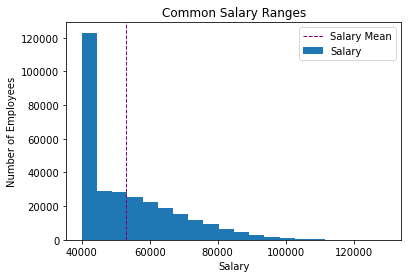

In [8]:
# Create a histogram to visualize the most common salary ranges for employees.

plt.hist(salary_data['salary'],20,density=False,label="Salary")
plt.axvline(salary_data['salary'].mean(), color='purple', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend()
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

In [9]:
departments = pd.read_sql('select * from departments', conn)
departments

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [10]:
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [11]:
title_data = pd.read_sql("select * from titles",conn)
title_data

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [12]:
title_data.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [13]:
employee_salaries = salary_data.merge(employees_data, on='emp_no')
employee_salaries.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [14]:
employee_title = employee_salaries.merge(title_data, on='emp_title_id')

In [15]:
employee_title.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer


In [16]:
# Create a bar chart of average salary by title.
avg_salary = employee_title.groupby(['title'])['salary'].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

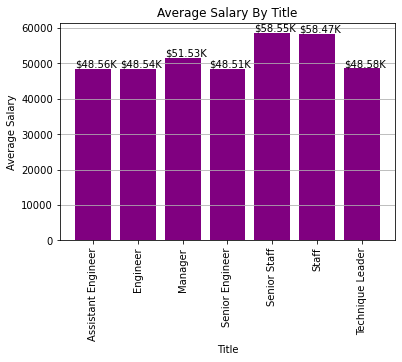

In [17]:
# Create a bar chart of average salary by title.

avg_sal_list = avg_salary.index
avg_sal_title = avg_salary.values
x_axis = np.arange(len(avg_sal_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, avg_sal_list, rotation=90)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.grid(axis="y")
chart=plt.bar(x_axis,avg_sal_title,color="purple", alpha=1,align="center")
for i in chart:
  yvalue = i.get_height()
  plt.text(i.get_x(),yvalue + 500, "${:,.2f}K".format(yvalue/1000))
plt.savefig("Average Salary By Title.png")
plt.show()


In [18]:
#  Epilogue
#  "Search your ID number." - employee ID number is 499942.

employee_title.query('emp_no == 499942')

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title
299999,499942,40000,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Technique Leader
